In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.constants import c
from astropy import units as u
from __plt__ import *

def my_autopct(pct):
    return (f'{pct:.2f}%') if pct > 5 else ''


In [2]:
gauss_simple_path = r'E:/databases/GAMAs/GaussFitSimple'
gauss_complex_path = r'E:/databases/GAMAs/GaussFitComplex'
bpt_whan_path = r'E:/databases/Merged.csv'

output_path = r'E:/databases/Gauss.csv'

In [3]:
GaussSimple = pd.read_csv(gauss_simple_path, sep="\s{2,}", header=None, index_col=0, engine='python', usecols=[0, 1, 4, 104, 105, 112, 117, 118], names=['SPECID', 'CATAID', 'Z', 'HA_REDCHI_EM', 'HA_FITFAIL', 'HA_CEN', 'SIG_HA', 'SIG_HA_ERR'])
GaussComplex = pd.read_csv(gauss_complex_path, sep="\s{2,}", header=None, index_col=0, engine='python', usecols=[0, 1, 75, 77, 85, 90, 91, 92, 93, 111, 112, 113, 114], names=['SPECID', 'CATAID', 'HA_REDCHI_EMB', 'HA_FITFAIL', 'HA_CEN', 'SIG_HA_N', 'SIG_HA_N_ERR', 'HA_N_FLUX', 'HA_N_FLUX_ERR', 'SIG_HA_B', 'SIG_HA_B_ERR', 'HA_B_FLUX', 'HA_B_FLUX_ERR'])
BPT_WHAN = pd.read_csv(bpt_whan_path, usecols=['SPECID', 'CATAID', 'Z', 'BPT', 'WHAN', 'mass_stellar_percentile16', 'mass_stellar_percentile50', 'mass_stellar_percentile84'])
NewData = pd.merge(BPT_WHAN, GaussComplex, how='inner', on='SPECID')
NewDataBase = pd.merge(NewData, GaussSimple, how='inner', on='SPECID')
print(NewDataBase.info)

NewDataBase.to_csv(output_path, index=False)

In [4]:
db = pd.read_csv(output_path)
db['HA_N_FLUX'] = pd.to_numeric(db['HA_N_FLUX'], errors='coerce')
db['HA_N_FLUX_ERR'] = pd.to_numeric(db['HA_N_FLUX_ERR'], errors='coerce' )
db['SIG_HA_B'] = pd.to_numeric(db['SIG_HA_B'], errors='coerce')
db['SIG_HA_B_ERR'] = pd.to_numeric(db['SIG_HA_B_ERR'], errors='coerce')
db['SIG_HA_ERR'] = pd.to_numeric(db['SIG_HA_ERR'], errors='coerce')
db.info()

BroadAGNs = db.query('SIG_HA_B > 0 & SIG_HA_B_ERR > 0 & SIG_HA_N > 0 & SIG_HA_N_ERR > 0 & HA_FITFAIL_x == 0 & HA_REDCHI_EMB < HA_REDCHI_EM & HA_N_FLUX > 0 & HA_N_FLUX > 2*HA_N_FLUX_ERR & HA_B_FLUX > 0 & HA_B_FLUX > 2*HA_B_FLUX_ERR')
BroadAGNs['VEL_B'] = np.log10(BroadAGNs['SIG_HA_B']*c.to('km/s').value/BroadAGNs['HA_CEN_x'])
BroadAGNs['VEL_B_ERR'] = np.log10(BroadAGNs['SIG_HA_B_ERR']*c.to('km/s').value/BroadAGNs['HA_CEN_x'])
BroadAGNs.to_csv('broads.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1483 entries, 0 to 1482
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   SPECID                     1483 non-null   object 
 1   CATAID_x                   1483 non-null   int64  
 2   Z_x                        1483 non-null   float64
 3   BPT                        1483 non-null   object 
 4   WHAN                       1483 non-null   object 
 5   mass_stellar_percentile16  1483 non-null   float64
 6   mass_stellar_percentile50  1483 non-null   float64
 7   mass_stellar_percentile84  1483 non-null   float64
 8   CATAID_y                   1483 non-null   float64
 9   HA_REDCHI_EMB              1483 non-null   float64
 10  HA_FITFAIL_x               1483 non-null   float64
 11  HA_CEN_x                   1483 non-null   float64
 12  SIG_HA_N                   1483 non-null   float64
 13  SIG_HA_N_ERR               1483 non-null   float

C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_14524\31525094.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BroadAGNs['VEL_B'] = np.log10(BroadAGNs['SIG_HA_B']*c.to('km/s').value/BroadAGNs['HA_CEN_x'])
C:\Users\ALEZHA_ACTIVE\AppData\Local\Temp\ipykernel_14524\31525094.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BroadAGNs['VEL_B_ERR'] = np.log10(BroadAGNs['SIG_HA_B_ERR']*c.to('km/s').value/BroadAGNs['HA_CEN_x'])


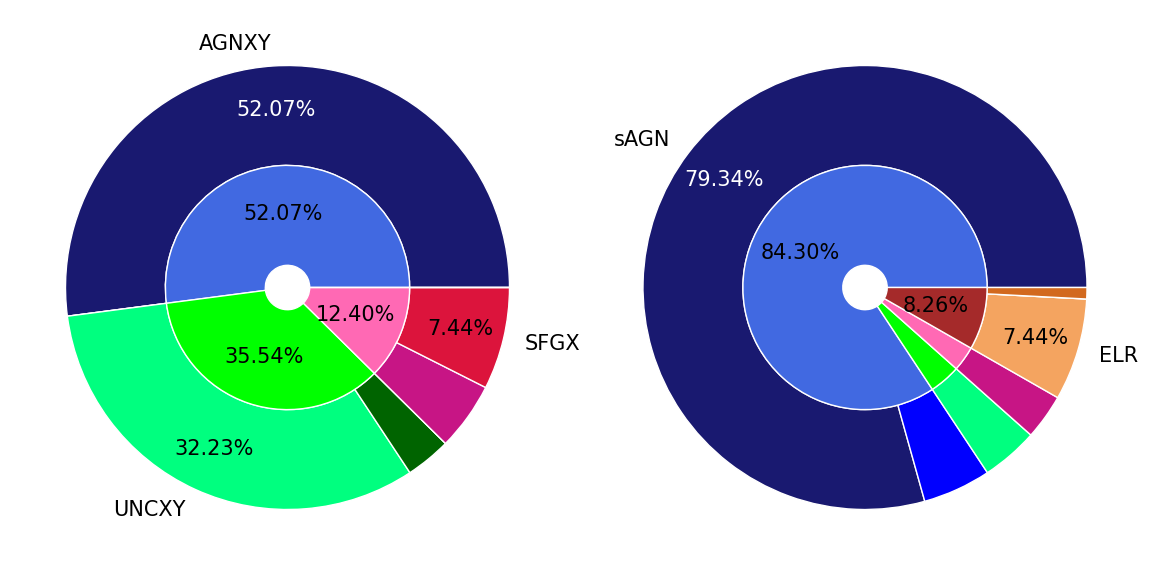

In [5]:
gs_top = plt.GridSpec(1, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 6), tight_layout=True)

plt.rcParams['font.size'] = 15

ax1 = fig.add_subplot(gs_top[0])
ax2 = fig.add_subplot(gs_top[1])
size = 0.45
BroadAGNs.reset_index(inplace=True, drop=True)

WHAN_labels = ['sAGN', 'wAGN', 'UNC', 'SFG', 'ELR', 'LLR', 'NER']
WHAN_colors = ['midnightblue', 'blue', 'springgreen', 'mediumvioletred', 'sandybrown', 'maroon', 'chocolate']

BPT_labels = ['AGNXY', 'AGNX', 'UNCXY', 'UNCX', 'UNCY', 'SFGXY', 'SFGX', 'SFGY', 'NOEL']
BPT_colors = ['midnightblue', 'dodgerblue', 'springgreen', 'darkgreen', 'limegreen', 'mediumvioletred', 'crimson', 'fuchsia', 'silver']

BPT_colors_merged = ['royalblue', 'lime', 'hotpink', 'w']
WHAN_colors_merged = ['royalblue', 'lime', 'hotpink', 'brown']


dict_count = {
    'AGNXY' : 0,
    'AGNX' : 0,
    'UNCXY' : 0,
    'UNCX' : 0,
    'UNCY' : 0,
    'SFGXY' : 0,
    'SFGX' : 0,
    'SFGY' : 0,
    'NOEL' : 0
}

for i in range(len(BroadAGNs)):
    dict_count[BroadAGNs['BPT'][i]] += 1
    
vals = []
for key in dict_count.keys():
    vals.append(dict_count[key])

merged_BPT = merging_BPT(vals)

patches, texts, autotexts = ax1.pie(vals, radius=1, labels=my_level_list(vals, 'BPT'), colors=BPT_colors, autopct=my_autopct_BPT, wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.8, labeldistance=1.1)
[autotext.set_color('black') for autotext in autotexts]
autotexts[0].set_color('white')
autotexts[3].set_color('white')
ax1.pie(merged_BPT, radius=1-size, colors=BPT_colors_merged, autopct=short_BPT_in(merged_BPT), wedgeprops=dict(width=size, edgecolor='w'))
ax1.set(aspect='equal')

dict_count = {
    'sAGN' : 0,
    'wAGN' : 0,
    'UNC' : 0,
    'SFG' : 0,
    'ELR' : 0,
    'LLR' : 0,
    'NER' : 0,
}

for i in range(len(BroadAGNs)):
    dict_count[BroadAGNs['WHAN'][i]] += 1
    
vals = []
for key in dict_count.keys():
    vals.append(dict_count[key])
    
merged_WHAN = merging_WHAN(vals)
patches, texts, autotexts = ax2.pie(vals, radius=1, labels=my_level_list(vals, 'WHAN'), colors=WHAN_colors, autopct=my_autopct_WHAN, wedgeprops=dict(width=size, edgecolor='w'), pctdistance=0.8, labeldistance=1.1)
[autotext.set_color('black') for autotext in autotexts]
autotexts[0].set_color('white')
autotexts[1].set_color('white')
autotexts[-2].set_color('white')
ax2.pie(merged_WHAN, radius=1-size, colors=WHAN_colors_merged, autopct=short_WHAN_in(merged_WHAN), wedgeprops=dict(width=size, edgecolor='w'))
ax2.set(aspect='equal')

fig.savefig('BLRs.pdf', dpi=70, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)


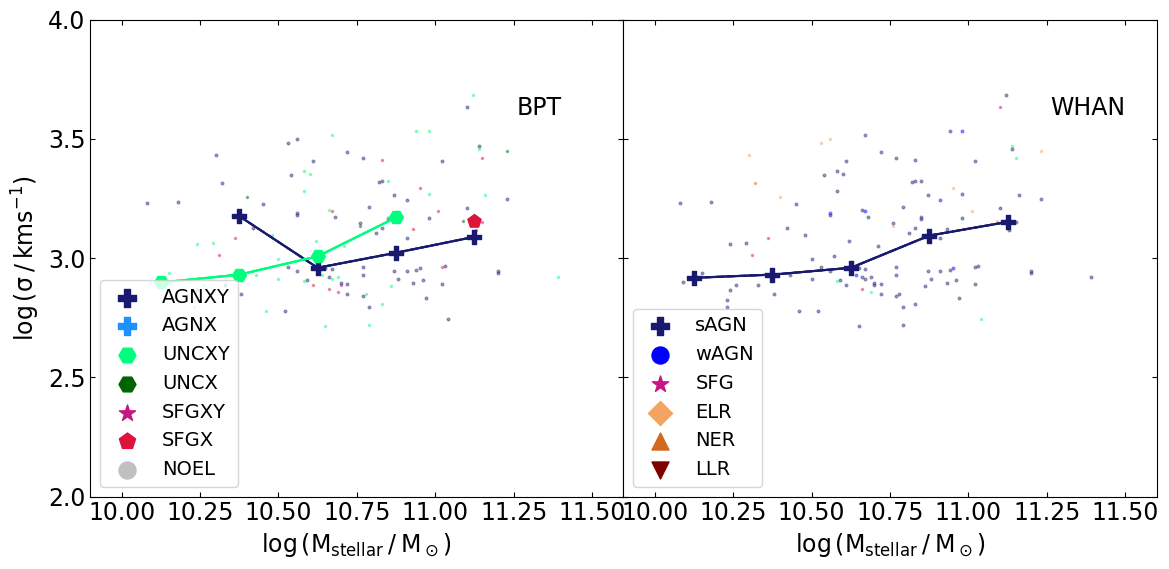

In [10]:
bids_mass_plt = [[10.0, 10.25], [10.25, 10.5], [10.5, 10.75], [10.75, 11], [11, 11.25], [11.25, 11.5]]

db = BroadAGNs

gs_top = plt.GridSpec(1, 2, hspace=0, wspace=0)
fig = plt.figure(figsize=(12, 6), tight_layout=True)

ax1 = fig.add_subplot(gs_top[0,0])
ax2 = fig.add_subplot(gs_top[0,1], sharey=ax1)

pars_dict_1 ={
    'db' : db,
    'ax1' : ax1,
    'ax2' : ax2,
    'x' : 'mass_stellar_percentile50',
    'y' : 'VEL_B',
    'err' : 'VEL_B_ERR',
    'xlim' : [9.9, 11.6],
    'ylim' : [2, 4],
    'xticks' : np.arange(10.0, 11.6, 0.25),
    'yticks' : np.arange(2, 4.1, 0.5),
    'xlabel' : r'$\log \mathrm{(M_{stellar} \: / \: M_\odot)}$',
    'ylabel' : r'$\log \mathrm{(\sigma \: / \: km s^{-1})}$',
    'bids': bids_mass_plt,
    'annotation' : True,
    'legend' : True
}

ax1, ax2 = plotting(pars_dict_1)
fig.savefig('sigma_ms.pdf', dpi=70, transparent = True, bbox_inches = 'tight', pad_inches = 0.0001)